# Qualitative Asessment of Neurotransmitters
This journal will import, calculate and plot the qualitative values for the neurotransmitters assayed during microdialysis

In [1]:
# This cell imports necessary libraries and provides their respective alias

import pandas as pd # used to manipulate CSVs
import numpy as np # used to perform calculations
from scipy.stats import linregress as linreg # used to extract m, b, & r^2
import matplotlib.pyplot as plt # used to generate plots
from IPython.display import display
font = {'fontname':'Liberation Serif'}


In [2]:
#This cell will import the csv files containing, respectively, data from:

Tissues = pd.read_csv('qualitative1.csv') # the microdissected samples
Curves = pd.read_csv('microdialisis_curves.csv') # standard curves for given HPLC Runs 

print("Standard Curve Values:")
display(Curves)

print("\nExperimental Values:")
display(Tissues)

Standard Curve Values:


,standard curve,Dopa Stock (V.s),5-HT Stock (V.s),Curve,Dopa Stock (pmol),5-Ht Stock (pmol)
0,day 1 D2&D3,1.28,2.02,0,32.64130,28.37440
1,day 1 D2&D3,0.63,0.96,0,16.32070,14.18720
2,day 1 D2&D3,0.12,0.19,0,1.63207,1.41872
3,day 1 D2&D3,0.06,0.10,0,0.16321,0.14187
4,day 1 D2&D3,0.01,0.02,0,0.08160,0.07094
5,day 2 D2&D3,0.01,0.02,1,0.08160,0.07094
6,day 2 D2&D3,0.06,0.09,1,0.16321,0.14187
7,day 2 D2&D3,0.12,0.19,1,1.63207,1.41872
8,day 2 D2&D3,0.62,0.98,1,16.32070,14.18720
9,day 2 D2&D3,1.21,1.93,1,32.64130,28.37440



Experimental Values:


,Animal,Experiment,Dopa (V.s),5-HT (V.s),time,Standard Curve,Condition,SCS
0,D2,1.0,Q,0.01,5,0,PD,unstim
1,D2,1.0,0,Q,10,0,PD,unstim
2,D2,1.0,0,Q,15,0,PD,unstim
3,D2,1.0,0,Q,20,0,PD,unstim
4,D2,1.0,0,0.01,25,0,PD,unstim
5,D2,1.0,0,0.01,30,0,PD,unstim
6,D2,1.0,0,Q,35,0,PD,unstim
7,D2,1.0,0,Q,40,0,PD,unstim
8,D2,1.0,0,Q,45,0,PD,unstim
9,D2,1.0,0,Q,50,0,PD,unstim


In [3]:


#This cell will create an array containing the coefficients
lin = pd.DataFrame({'m': [], 'b': [], 'r2': []}) #Create dataframe
Dopa = lin
Ser = lin

# This for loop will iterate through all unique HPLC runs to calculate and store m, b, and r^2
for ii in range(max(Curves['Curve']+1)): #uses max to find last experiment
    #calculates values for dopamine
    lr = linreg(Curves['Dopa Stock (V.s)'][Curves['Curve']==ii], Curves['Dopa Stock (pmol)'][Curves['Curve']==ii])
    m=lr[0]
    b=lr[1]
    r2=lr[2]

    #stores values for dopamine
    Dopa= Dopa.append({'m': m, 'b': b, 'r2': r2}, ignore_index=True)
    
    #calculates values for serotonin
    lr = linreg(Curves['5-HT Stock (V.s)'][Curves['Curve']==ii], Curves['5-Ht Stock (pmol)'][Curves['Curve']==ii])
    m=lr[0]
    b=lr[1]
    r2=lr[2]

    #stores values for serotonin
    Ser= Ser.append({'m': m, 'b': b, 'r2': r2}, ignore_index=True)

print("Dopamine Regression Values:")
display(Dopa)
print("\nSerotonin Regression Values:")
display(Ser)



Dopamine Regression Values:


,m,b,r2
0,26.393232,-0.917382,0.999022
1,27.874154,-1.093382,0.999157
2,26.668151,-1.184257,0.995372
3,30.284823,-1.129009,0.995505
4,29.365446,-1.176867,0.995563



Serotonin Regression Values:


,m,b,r2
0,14.613994,-0.777382,0.998420
1,15.202917,-0.921647,0.999260
2,14.754665,-0.988130,0.996389
3,15.256568,-1.079985,0.995259
4,13.959603,-1.035876,0.995676


In [4]:
# This cell will calculate the concentration of Dopa and 5-HT in pmol

#Note the 500 multiplier converts from pmol to fmol, and takes into account the fact that samples are half the injected volume as standards
# This for loop will iterate through all tissue samples and save the pmol concentration of each
for ii in range(len(Tissues)) :
    try:
        
# Qualitative results are plotted as 50% of the LOQ so as to indicate that they are above zero,
        if (Tissues['Dopa (V.s)'][ii] != 'Q'):
# x=(y-b)/m for Dopamine
            Tissues.loc[ii, 'Dopa (fmol)'] = 500*(float(Tissues['Dopa (V.s)'][ii]) -Dopa['b'][(Tissues['Standard Curve'][ii])])/Dopa['m'][(Tissues['Standard Curve'][ii])]
# Removes Negatives  
            if Tissues['Dopa (fmol)'][ii] < 0:
                Tissues.loc[ii,'Dopa (fmol)'] = 0
#  Sets concentration to maximum possible from experimental standard curve 
        else:
            Tissues.loc[ii,'Dopa (fmol)'] = 250*(0.08160 -Dopa['b'][(Tissues['Standard Curve'][ii])])/Dopa['m'][(Tissues['Standard Curve'][ii])]
        if (Tissues['Dopa (V.s)'][ii] == '0'):
            Tissues.loc[ii,'Dopa (fmol)'] = 0

            
        if (Tissues['5-HT (V.s)'][ii] == '0'):
            Tissues.loc[ii,'5-HT (fmol)'] = 0
        elif (Tissues['5-HT (V.s)'][ii] != 'Q'):
# x=(y-b)/m for 5-HT
            Tissues.loc[ii,'5-HT (fmol)'] = 500*(float(Tissues['5-HT (V.s)'][ii])-Ser['b'][(Tissues['Standard Curve'][ii])])/Ser['m'][(Tissues['Standard Curve'][ii])]
# Removes Negatives
            if float(Tissues['5-HT (fmol)'][ii]) < 0:
                Tissues.loc[ii,'5-HT (fmol)'] = 0   
#  Sets concentration to maximum possible from experimental standard curve for readings that are over
        else :
            Tissues.loc[ii,'5-HT (fmol)'] = 250*(0.07094 -Ser['b'][(Tissues['Standard Curve'][ii])])/Ser['m'][(Tissues['Standard Curve'][ii])]

    
    
    except KeyError:
            continue
            #print('error at ii=',ii)
display(Tissues.head())

,Animal,Experiment,Dopa (V.s),5-HT (V.s),time,Standard Curve,Condition,SCS,Dopa (fmol),5-HT (fmol)
0,D2,1.0,Q,0.01,5,0,PD,unstim,9.462479,26.939324
1,D2,1.0,0,Q,10,0,PD,unstim,0.000000,14.512156
2,D2,1.0,0,Q,15,0,PD,unstim,0.000000,14.512156
3,D2,1.0,0,Q,20,0,PD,unstim,0.000000,14.512156
4,D2,1.0,0,0.01,25,0,PD,unstim,0.000000,26.939324


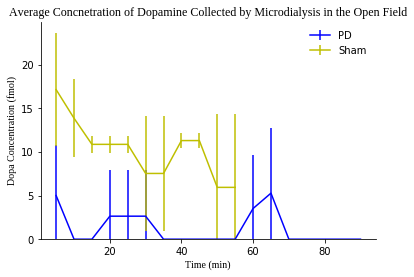

In [5]:
pd_mean=Tissues[Tissues['Condition']=='PD'].groupby(["time"]).mean().add_suffix(' Mean').reset_index()
pd_std=Tissues[Tissues['Condition']=='PD'].groupby(["time"]).std().add_suffix(' Std').reset_index()

sham_mean=Tissues[Tissues['Condition']=='Sham'].groupby(["time"]).mean().add_suffix(' Mean').reset_index()
sham_std=Tissues[Tissues['Condition']=='Sham'].groupby(["time"]).std().add_suffix(' Std').reset_index()

unstim=pd_mean.merge(pd_std)
stim=sham_mean.merge(sham_std)

fig, ax = plt.subplots()    

plt.errorbar(unstim["time"],unstim["Dopa (fmol) Mean"],yerr=unstim["Dopa (fmol) Std"],label="PD", color='b')
plt.errorbar(stim["time"],stim["Dopa (fmol) Mean"],yerr=stim["Dopa (fmol) Std"],label="Sham",color='y')

#X-axis parameters

ax.set_xlabel("Time (min)", **font)

#Y-axis parameters
ax.set_ylabel('Dopa Concentration (fmol)', **font)

#Title and legend parameters
ax.set_title(("Average Concnetration of Dopamine Collected by Microdialysis in the Open Field"), **font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False)
plt.gca().set_ylim(bottom=0)

display()

file_path2='Qualitative_dopa.png'

plt.savefig(file_path2, dpi=300, transparent=True)

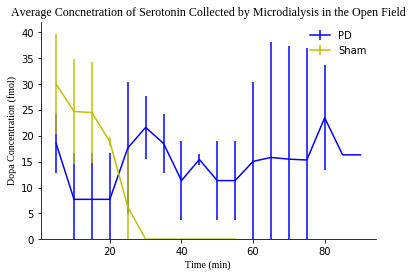

In [6]:
fig, ax = plt.subplots()    

plt.errorbar(unstim["time"],unstim["5-HT (fmol) Mean"],yerr=unstim["5-HT (fmol) Std"],label="PD", color='b')
plt.errorbar(stim["time"],stim["5-HT (fmol) Mean"],yerr=stim["5-HT (fmol) Std"],label="Sham",color='y')

#X-axis parameters

ax.set_xlabel("Time (min)", **font)

#Y-axis parameters
ax.set_ylabel('Dopa Concentration (fmol)', **font)

#Title and legend parameters
ax.set_title(("Average Concnetration of Serotonin Collected by Microdialysis in the Open Field"), **font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False)
plt.gca().set_ylim(bottom=0)

display()

file_path2='Qualitative_5HT.png'

plt.savefig(file_path2, dpi=300, transparent=True)

In [7]:
ii=1

LOQ_Dopa=500*(0.08160 -Dopa['b'][(Tissues['Standard Curve'][ii])])/Dopa['m'][(Tissues['Standard Curve'][ii])]
print("LOQ for Dopa=",str(LOQ_Dopa))

LOQ_5HT=500*(0.07094 -Ser['b'][(Tissues['Standard Curve'][ii])])/Ser['m'][(Tissues['Standard Curve'][ii])]
print("LOQ for 5-HT=",str(LOQ_5HT))

LOQ for Dopa= 18.92495739015368
LOQ for 5-HT= 29.02431146458852
